<a href="https://colab.research.google.com/github/escape13/deepfried/blob/master/IntroTorch/HandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [3]:
# get handwritten digit MNIST dataset

from torchvision import datasets, transforms

# converse and normalize dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# download dataset
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [9]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


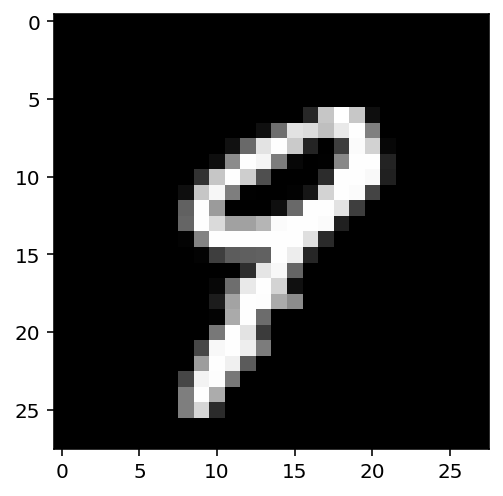

In [10]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray')

In [18]:
features = np.zeros((64, 784))

for i in range(images.shape[0]):
    features[i] = np.reshape(images[i][0], (1, 784))

features = torch.from_numpy(features).float()    

In [19]:
n_input = 784
n_hidden = 256
n_output = 10

In [20]:
def activation(x):
    return 1/(1 + torch.exp(-x))

In [21]:
W1 = torch.randn((n_input, n_hidden))
W2 = torch.randn((n_hidden, n_output))
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [22]:
torch.mm(features, W1)

tensor([[-2.7929e+00,  2.9397e+01,  4.6800e+01,  ...,  8.0923e+00,
          1.1710e+01, -1.9698e+01],
        [-1.0708e+01, -1.0246e+01,  3.3774e+01,  ...,  2.7676e+01,
          1.7408e+01, -2.7391e+01],
        [-2.5177e+01,  6.0671e+00,  3.9646e+01,  ..., -6.3560e-02,
          6.0118e+00, -4.7065e+01],
        ...,
        [ 1.9397e+01,  3.6830e+01,  5.4031e+01,  ...,  3.4170e+01,
          4.1449e+00, -6.8348e+01],
        [-1.5743e+01, -6.0658e+00,  4.5175e+01,  ..., -1.1834e+01,
          3.2463e+00, -3.7084e+01],
        [ 2.0074e+01,  2.8986e+00,  3.7676e+01,  ..., -1.1920e+01,
          1.0194e+01, -1.6775e+01]])